# Logistic Regression

#### 1. Data Exploration:

a. Load the dataset and perform exploratory data analysis (EDA).

In [1]:
import pandas as pd

df_train = pd.read_csv('Titanic_train.csv')
df_test = pd.read_csv('Titanic_test.csv')

(df_train.shape,df_test.shape)

((891, 12), (418, 11))

b. Examine the features, their types, and summary statistics.

In [2]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [3]:
df_test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
df_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
df_test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          326
Embarked         0
dtype: int64

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
numerical_train_col = df_train.select_dtypes(include='number').columns.tolist()
numerical_train_col

['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

c. Create visualizations such as histograms, box plots, or pair plots to visualize the distributions and relationships between features.

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

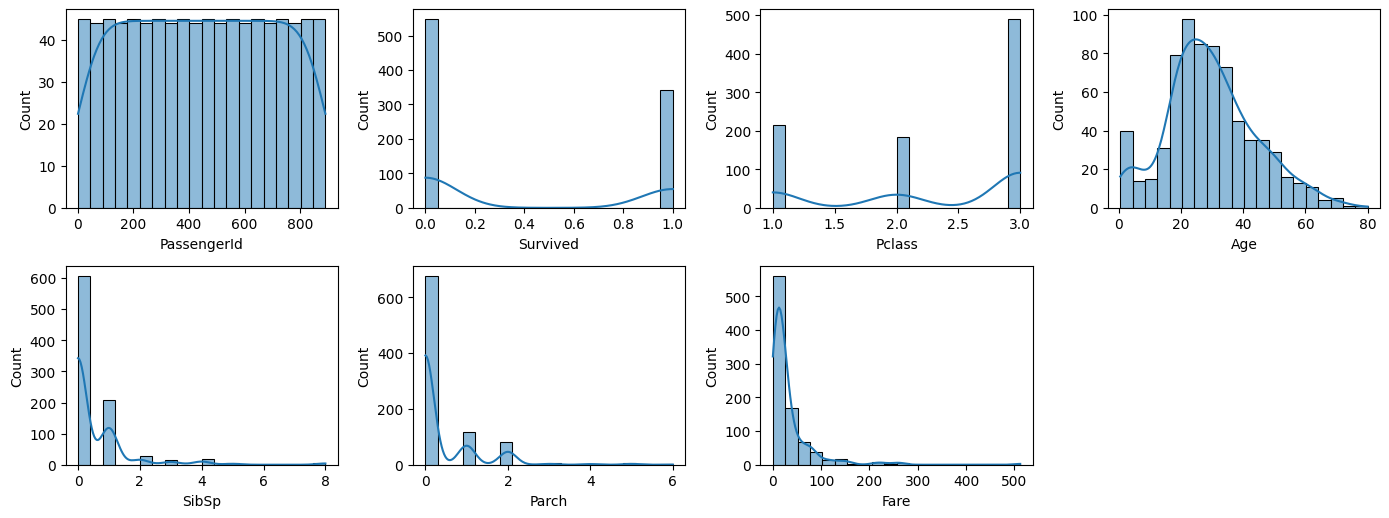

In [10]:
# Histogram

plt.figure(figsize=(14,10))
for i,col in enumerate(numerical_train_col):
    plt.subplot(4,4,i+1)
    sns.histplot(df_train[col],kde=True,bins=20)


plt.tight_layout()
plt.show()

In [11]:
df_train.groupby('Sex')['Survived'].sum()

Sex
female    233
male      109
Name: Survived, dtype: int64

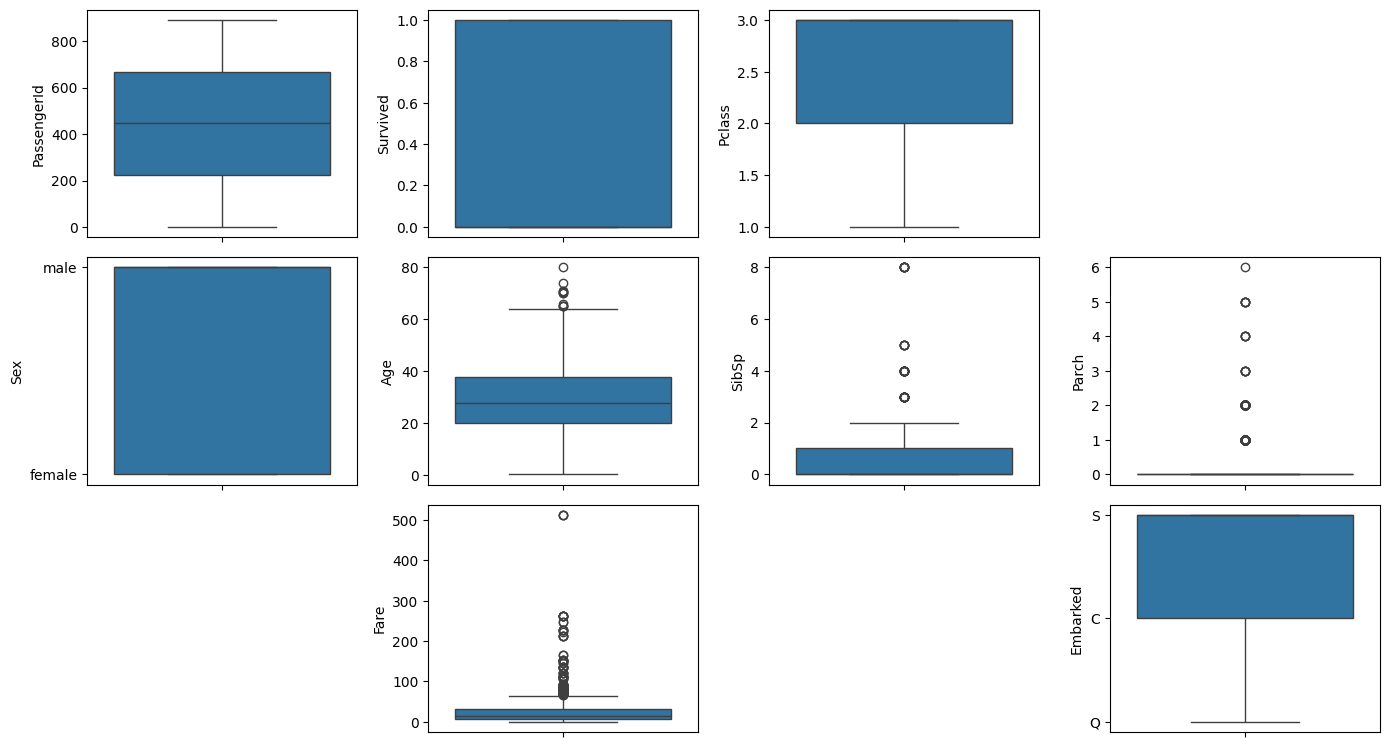

In [12]:
# Box plot

plt.figure(figsize=(14,10))
for i,col in enumerate(df_train.columns.tolist()):
    if col in ['Name','Ticket','Cabin']: continue
    plt.subplot(4,4,i+1)
    sns.boxplot(df_train[col])

plt.tight_layout()
plt.show()

In [13]:
df_train.corr(numeric_only=True)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


<Figure size 1400x1000 with 0 Axes>

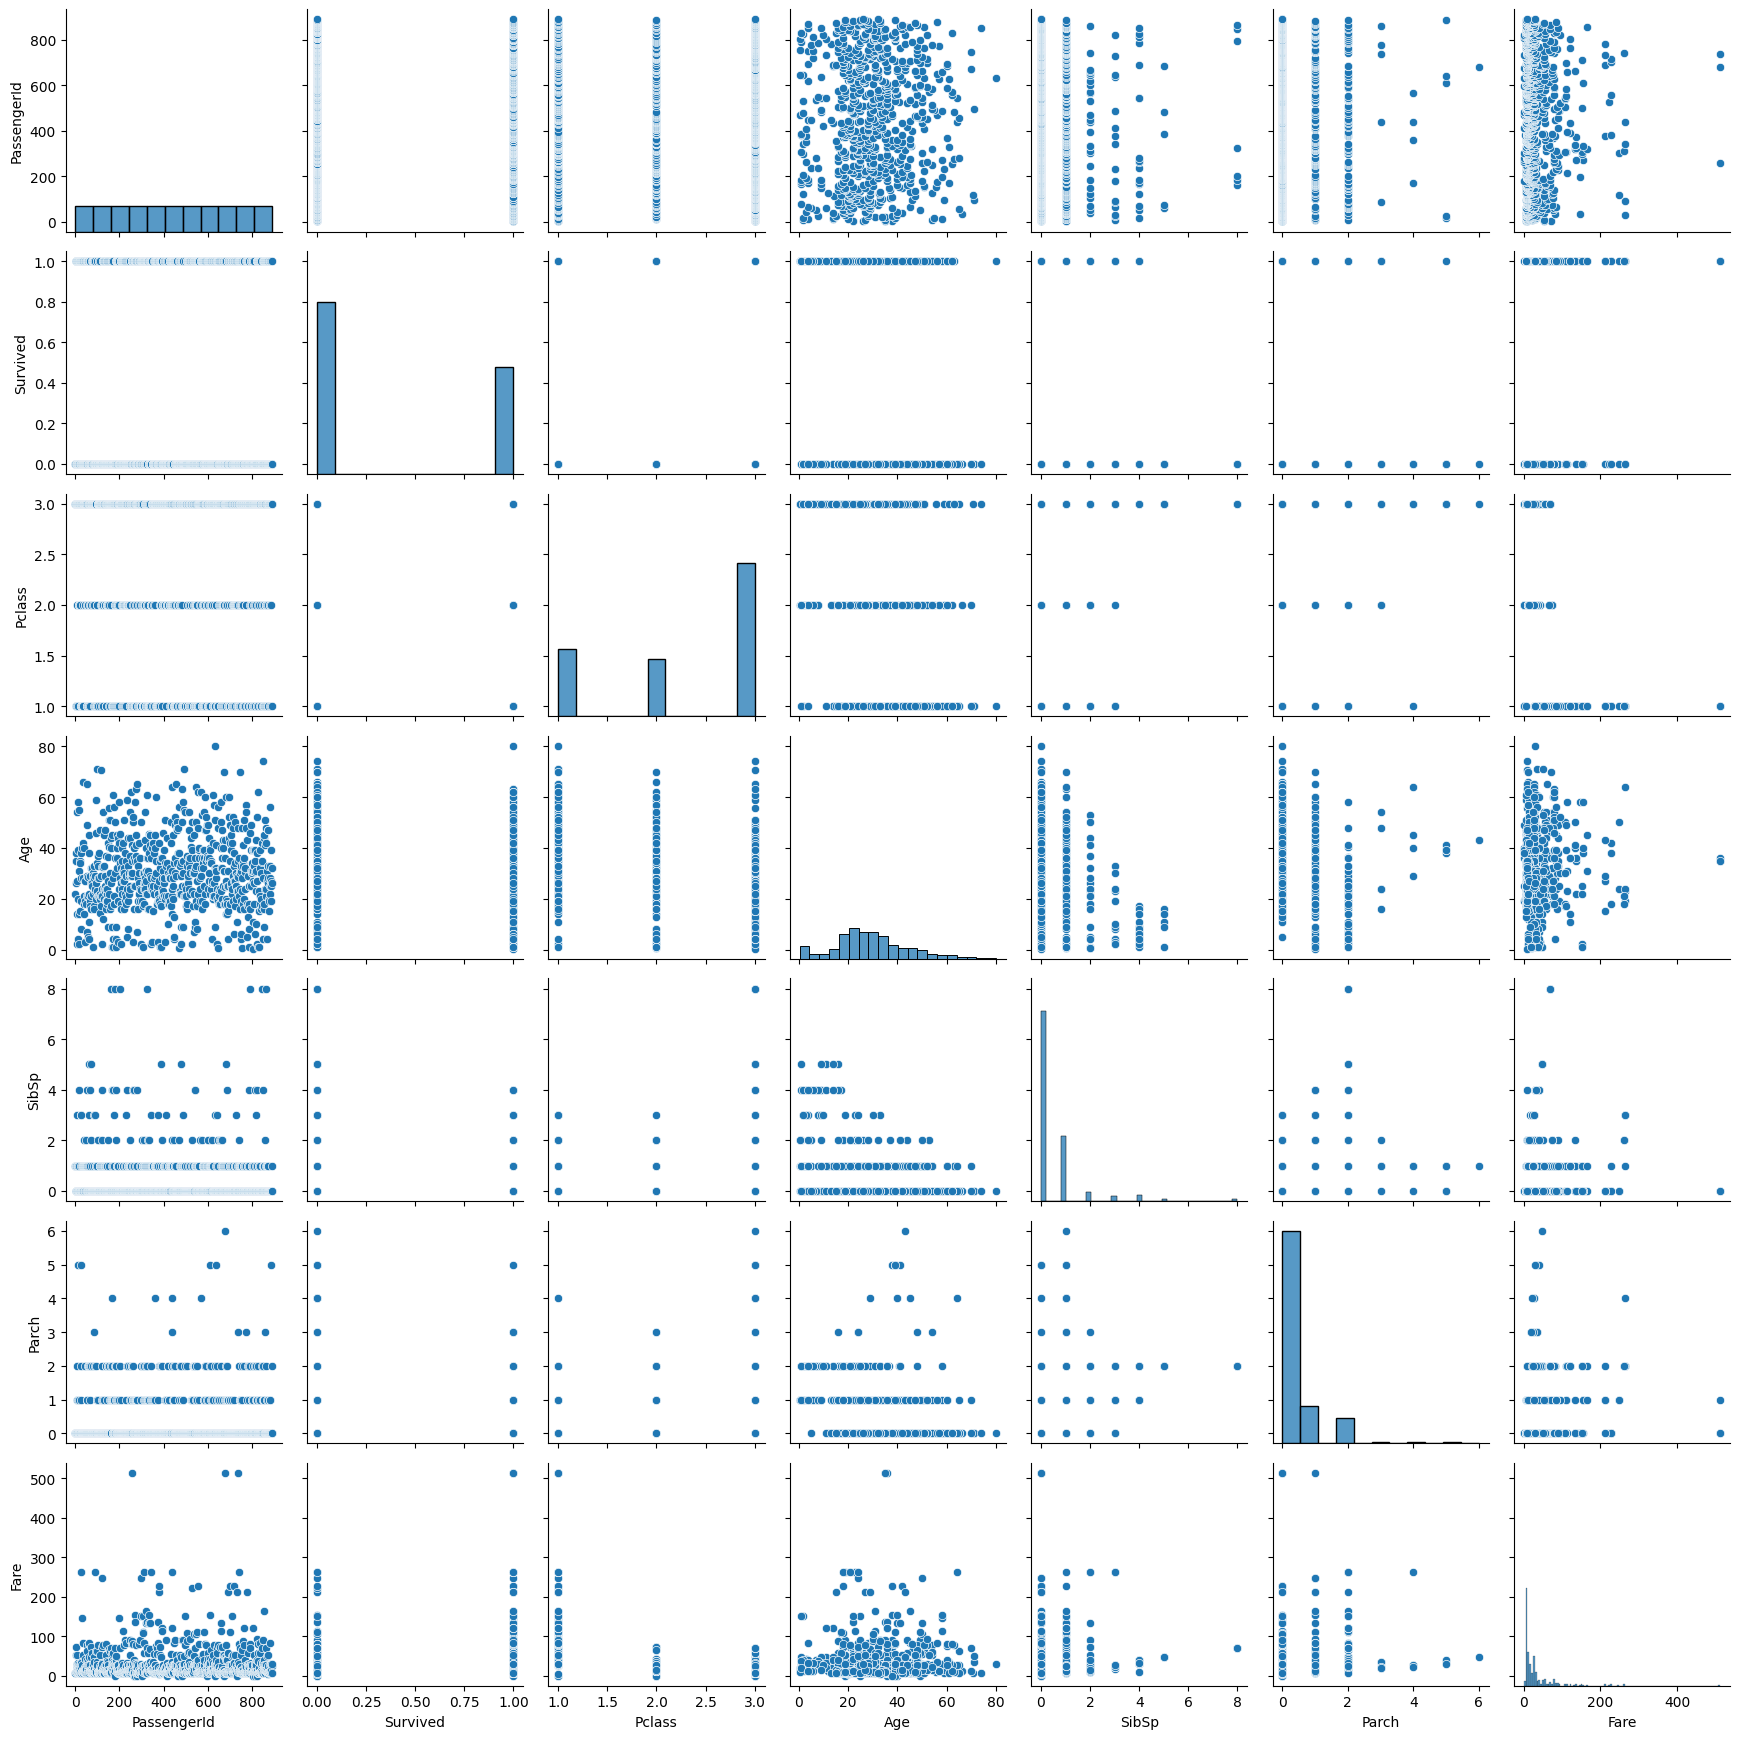

In [14]:
# Pair plot

plt.figure(figsize=(14,10))
sns.pairplot(df_train)
plt.tight_layout()
plt.show()

- Analyze any patterns or correlations observed in the data.

Sex, Pclass, Fare, Age → important predictors.

SibSp and Parch → weak influence but can be combined into family size.

Cabin → mostly missing, consider dropping or extracting deck info.

Embarked → minor effect, can be one-hot encoded.

Target variable (Survived) is slightly imbalanced, might need stratified splitting.

### 2. Data Preprocessing:

a. Handle missing values (e.g., imputation).

In [15]:
df_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [16]:
df_test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          326
Embarked         0
dtype: int64

In [17]:
df_train['Age']=df_train['Age'].fillna(df_train['Age'].mean())

In [18]:
df_train['Cabin'] = df_train['Cabin'].fillna(df_train['Cabin'].mode()[0])
df_train['Embarked'] = df_train['Embarked'].fillna(df_train['Embarked'].mode()[0])

In [19]:
df_train['Cabin']

0      B96 B98
1          C85
2      B96 B98
3         C123
4      B96 B98
        ...   
886    B96 B98
887        B42
888    B96 B98
889       C148
890    B96 B98
Name: Cabin, Length: 891, dtype: object

In [20]:
df_train.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [21]:
df_test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          326
Embarked         0
dtype: int64

In [22]:
df_test['Cabin'].mode()

0    B57 B59 B63 B66
Name: Cabin, dtype: object

In [23]:
df_test['Age']=df_test['Age'].fillna(df_test['Age'].mean())
df_test['Cabin'] = df_test['Cabin'].fillna(df_test['Cabin'].mode()[0])
df_test['Embarked'] = df_test['Embarked'].fillna(df_test['Embarked'].mode()[0])

In [24]:
df_test.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Cabin          0
Embarked       0
dtype: int64

In [25]:
df_test.dropna(inplace=True)

b. Encode categorical variables.

In [26]:
df_train.select_dtypes(include='object').columns

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

In [27]:
df_train['Sex'] = df_train['Sex'].map({'male': 0, 'female': 1})

In [28]:
df_train = pd.get_dummies(df_train,columns=['Embarked'],drop_first=True,dtype='int')

In [29]:
# Not Useful columns for Logistic Regression
df_train.drop(columns=['Name','Ticket','PassengerId','Cabin'],axis=1,inplace=True)

In [30]:
df_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,0,3,0,22.000000,1,0,7.2500,0,1
1,1,1,1,38.000000,1,0,71.2833,0,0
2,1,3,1,26.000000,0,0,7.9250,0,1
3,1,1,1,35.000000,1,0,53.1000,0,1
4,0,3,0,35.000000,0,0,8.0500,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.000000,0,0,13.0000,0,1
887,1,1,1,19.000000,0,0,30.0000,0,1
888,0,3,1,29.699118,1,2,23.4500,0,1
889,1,1,0,26.000000,0,0,30.0000,0,0


In [31]:
df_test['Sex'] = df_test['Sex'].map({'male': 0, 'female': 1})
df_test = pd.get_dummies(df_test,columns=['Embarked'],drop_first=True,dtype='int')
# Not Useful columns for Logistic Regression
df_test.drop(columns=['Name','Ticket','PassengerId','Cabin'],axis=1,inplace=True)

In [32]:
df_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,3,0,34.5,0,0,7.8292,1,0
1,3,1,47.0,1,0,7.0000,0,1
2,2,0,62.0,0,0,9.6875,1,0
3,3,0,27.0,0,0,8.6625,0,1
4,3,1,22.0,1,1,12.2875,0,1


### 3. Model Building:
a. Build a logistic regression model using appropriate libraries (e.g., scikit-learn).

b. Train the model using the training data.

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

Y = df_train['Survived']
X = df_train.iloc[:,1:]

x_train,x_val,y_train,y_val = train_test_split(X,Y,test_size=0.2,random_state=42)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)


model = LogisticRegression(max_iter=500)
model.fit(x_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,500
,multi_class,'deprecated'


In [34]:
y_pred = model.predict(x_val)
y_pred

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1], dtype=int64)

### 4. Model Evaluation:
a. Evaluate the performance of the model on the testing data using accuracy, precision, recall, F1-score, and ROC-AUC score.

Visualize the ROC curve.

In [35]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score

print("Accuracy Score : ",accuracy_score(y_val,y_pred))
print("Precison Score : ",precision_score(y_val,y_pred))
print("Recall Score   : ",recall_score(y_val,y_pred))
print("F1-Score       : ",f1_score(y_val,y_pred))
print("roc_auc_curve  : ",roc_auc_score(y_val,y_pred))


Accuracy Score :  0.8100558659217877
Precison Score :  0.7857142857142857
Recall Score   :  0.7432432432432432
F1-Score       :  0.7638888888888888
roc_auc_curve  :  0.8001930501930502


In [36]:
import numpy as np
y_pred_prob = model.predict_proba(x_val)[:,1]
y_pred_prob

array([0.10320042, 0.21893551, 0.13110472, 0.89323975, 0.75586979,
       0.93652952, 0.68737336, 0.08787036, 0.77130488, 0.92647061,
       0.33199529, 0.06658003, 0.38051709, 0.14594475, 0.19434384,
       0.94180673, 0.29804266, 0.68741423, 0.2421448 , 0.32844776,
       0.11751072, 0.40845998, 0.62888601, 0.13146075, 0.10171225,
       0.06428651, 0.47091692, 0.21996383, 0.07652131, 0.61101537,
       0.13469534, 0.67533253, 0.55289598, 0.62045469, 0.13842116,
       0.12405033, 0.45972187, 0.68737336, 0.94736101, 0.1002724 ,
       0.19684953, 0.07775035, 0.10030581, 0.13026218, 0.58504155,
       0.08493338, 0.13476883, 0.12112762, 0.11730026, 0.32663288,
       0.73232299, 0.81619108, 0.03670849, 0.50579194, 0.0473764 ,
       0.93661697, 0.21364196, 0.93464981, 0.78833583, 0.75441762,
       0.12754781, 0.86683274, 0.77671724, 0.44089788, 0.13026218,
       0.64626126, 0.30825395, 0.10225486, 0.14370969, 0.88264899,
       0.76565775, 0.95131594, 0.58084226, 0.90973073, 0.12077

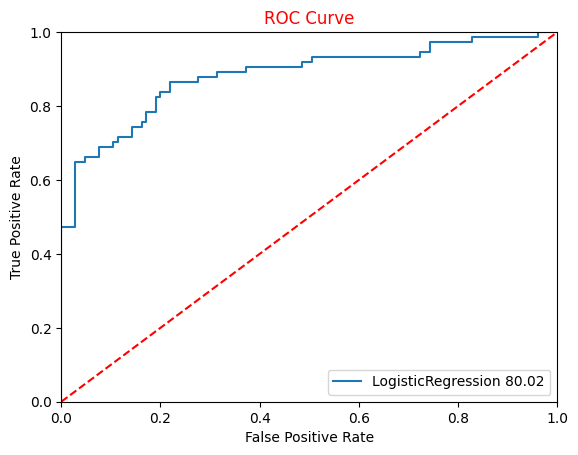

In [37]:
from sklearn.metrics import roc_curve

fpr,tpr,thresold = roc_curve(y_val,y_pred_prob)

plt.plot(fpr,tpr,label=f'LogisticRegression {round(roc_auc_score(y_val,y_pred)*100,2)}')
plt.plot([0.0,1.0],'r--')
plt.xlim([0.0,1.])
plt.ylim([0.0,1.])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve',color='red')
plt.legend(loc='lower right')
plt.show()



### 5. Interpretation:
a. Interpret the coefficients of the logistic regression model.

In [38]:
features = X.columns
coeff = model.coef_[0]
coeff


array([-0.78832093,  1.27629197, -0.40553705, -0.3513846 , -0.09900402,
        0.12470823, -0.03959426, -0.19227489])

In [39]:
coef_df = pd.DataFrame({
    "Feature": features,
    "Coefficient": coeff
}).sort_values(by="Coefficient", ascending=False)

b. Discuss the significance of features in predicting the target variable (survival probability in this case).

In [40]:
coef_df

,Feature,Coefficient
1,Sex,1.276292
5,Fare,0.124708
6,Embarked_Q,-0.039594
4,Parch,-0.099004
7,Embarked_S,-0.192275
3,SibSp,-0.351385
2,Age,-0.405537
0,Pclass,-0.788321


- Logistic regression coefficients are in log-odds units.
- A positive coefficient → increases the probability of survival.
- A negative coefficient → decreases the probability of survival.

In [41]:
coef_df["Odds Ratio"] = np.exp(coef_df["Coefficient"])
print(coef_df)

      Feature  Coefficient  Odds Ratio
1         Sex     1.276292    3.583328
5        Fare     0.124708    1.132818
6  Embarked_Q    -0.039594    0.961179
4       Parch    -0.099004    0.905739
7  Embarked_S    -0.192275    0.825080
3       SibSp    -0.351385    0.703713
2         Age    -0.405537    0.666619
0      Pclass    -0.788321    0.454607


Odds Ratio > 1 → feature increases survival odds.

Odds Ratio < 1 → feature decreases survival odds.

### Save the model

In [42]:
import pickle

pickle.dump(model,open('LogisticRegression_model.sav','wb'))


In [59]:
pickle.dump(scaler,open('Scaler.sav','wb'))

# Interview Questions

Q1. What is the difference between Precision and Recall?

**Precision**: It measures how many of the predicted positive cases were actually positive.
- Formula : Precision = True Positives / (True Positivies + False Positives)
- High precision means very few false positives (the model rarely labels negative cases as positive).
- Use case: When false positives are costly, e.g., spam detection — we don’t want to mark important emails as spam.

***Recall:*** It measures how many of the actual positive cases were correctly identified.
Formula:𝑅𝑒𝑐𝑎𝑙𝑙=𝑇𝑟𝑢𝑒 𝑃𝑜𝑠𝑖𝑡𝑖𝑣𝑒𝑠/ (𝑇𝑟𝑢𝑒 𝑃𝑜𝑠𝑖𝑡𝑖𝑣𝑒𝑠+𝐹𝑎𝑙𝑠𝑒 𝑁𝑒𝑔𝑎𝑡𝑖𝑣𝑒𝑠)
- High recall means the model captures most of the true positives (few missed cases).
- Use case: When false negatives are costly, e.g., in medical diagnosis — missing a disease case is critical.

🔹 Key Difference:

Precision → Quality of positive predictions.

Recall → Quantity of positive predictions correctly captured.


### Q2. What is Cross-Validation, and why is it important in binary classification?

**Cross-Validation (CV):**
It is a model evaluation technique that helps check how well a model generalizes to unseen data.
Instead of using one train-test split, the data is divided into multiple folds (e.g., 5 or 10).

Example: K-Fold Cross Validation
Split dataset into K equal parts.
Train on (K-1) folds and test on the remaining fold.
Repeat K times and take the average performance.

*Improves reliability of performance metrics:*
Instead of depending on one random split, CV ensures the model performs consistently across different subsets.
Gives a more stable estimate of accuracy, precision, recall, and F1-score.

*Prevents overfitting or underfitting:*
Ensures the model doesn’t just memorize one specific training set.
Encourages generalization to new unseen data.

*Useful for model selection and tuning:*
During hyperparameter tuning (e.g., in Ridge/Lasso), CV helps identify the best parameters that work across all folds.
